## i. Perkenalan
##### Nama : Taufit Hidayat Watan 
##### Batch : 10


##### Data set ini berisi data tentang 721 Pokemon, lengkap dengan stats berupa HP, Attack, Defense, Speed Attack, Speed Defense, Speed, LEgendary, Generation serta Type Pokemo yang mana ada Pokemon yang memiliki 1 atau 2 Type.

##### Objective dari porject ini adalah : 
##### 1. Menentukan diantara Pokemon generasi ke 4 yang memiliki 1 type serta memiliki total point di atas 500 tipe Legendary apakah yang memiliki point Attack paling lemah.
##### 2. Mengelompokan rata - rata point defense dari Pokemon legendary yang memiliki 2 type serta attack point di atas 150 berdasarkan generation.
##### 3. MMengelompokan Pokemon generasi apa yang memiliki point Attack tertinggi di antara semua Pokemon dengan point defense tertinggi.

## ii. Import pustaka

In [3]:
import pandas as pd
import numpy as np

## iii. Data loading dan explorasi sederhana

In [4]:
df = pd.read_csv("Pokemon.csv")

In [5]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## iii. Data Cleaning

### Mengganti nama column

In [7]:
df.rename(columns={u'#': u'No'}, inplace=True)
df.rename(columns={u'Type 1': u'Type_1'}, inplace=True)
df.rename(columns={u'Type 2': u'Type_2'}, inplace=True)

### Merubah data Boolean menjadi String

In [8]:
df_new = df.astype({'Legendary' : 'str'})

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No          800 non-null    int64 
 1   Name        800 non-null    object
 2   Type_1      800 non-null    object
 3   Type_2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    object
dtypes: int64(9), object(4)
memory usage: 81.4+ KB


### Mengganti isi kolom Legendary yang awalnya False/True mendai Y/N

In [10]:
df_new['Legendary'].replace('False', 'N', inplace = True)

In [11]:
df_new['Legendary'].replace('True', 'Y', inplace = True)

In [12]:
df_new.head()

,No,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,N
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,N
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,N
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,N
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,N


### Cek Missing value

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No          800 non-null    int64 
 1   Name        800 non-null    object
 2   Type_1      800 non-null    object
 3   Type_2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Mengisi Missing Value

In [14]:
df_new['Type_2'].fillna('x', inplace = True)

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No          800 non-null    int64 
 1   Name        800 non-null    object
 2   Type_1      800 non-null    object
 3   Type_2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    object
dtypes: int64(9), object(4)
memory usage: 81.4+ KB


# iv. Data Exploration

### Query 1
##### Menentukan Pokemon generasi ke 4 dan memiliki 1 type serta memliki total point di atas 500 tetpai bukan Pokemon legendary.

In [44]:
pokemon_1 = df_new[
    (df_new['Total'] >= 500) &
    (df_new['Type_2'] == 'x') &
    (df_new['Generation'] == 4) &
    (df_new['Legendary'] == 'N')
]

In [68]:
pokemon_1

,No,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
450,405,Luxray,Electric,x,523,80,120,79,95,79,70,4,N
500,450,Hippowdon,Ground,x,525,108,112,118,68,72,47,4,N
514,463,Lickilicky,Normal,x,515,110,85,95,80,95,50,4,N
516,465,Tangrowth,Grass,x,535,100,100,125,110,50,50,4,N
517,466,Electivire,Electric,x,540,75,123,67,95,85,95,4,N
518,467,Magmortar,Fire,x,540,75,95,67,125,95,83,4,N
521,470,Leafeon,Grass,x,525,65,110,130,60,65,95,4,N
522,471,Glaceon,Ice,x,525,65,60,110,130,95,65,4,N
525,474,Porygon-Z,Normal,x,535,85,80,70,135,75,90,4,N
529,477,Dusknoir,Ghost,x,525,45,100,135,65,135,45,4,N


### Grouping 1
##### Menentukan diantara Pokemon generasi ke 4 yang memiliki 1 type serta memiliki total point di atas 500 tipe Legendary apakah yang memiliki point Attack paling lemah.

In [103]:
poke_1 = df_new[
    (df_new['Total'] >= 500) &
    (df_new['Type_2'] == 'x') &
    (df_new['Generation'] == 4) 
].groupby('Legendary')['Attack'].min().to_frame()

In [104]:
poke_1

,Attack
Legendary,
N,60
Y,75


### Query 2
##### Menetukan Pokemon legendary yang memiliki 2 type serta attack pint di atas 150.

In [19]:
df_new[
    (df_new['Legendary'] == 'Y') &
    (df_new['Type_2'] != 'x') &
    (df_new['Attack'] >= 150)
]

,No,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,Y
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,Y
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,Y
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,Y
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,Y
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,Y
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,Y
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,Y


### Grouping 2
##### Mengelompokan rata - rata point defense dari Pokemon legendary yang memiliki 2 type serta attack point di atas 150 berdasarkan generation.

In [90]:
poke_2 = df_new[
    (df_new['Legendary'] == 'Y') &
    (df_new['Type_2'] != 'x') &
    (df_new['Attack'] >= 150)
].groupby('Generation')['Defense'].mean().to_frame()

In [91]:
poke_2

,Defense
Generation,
1,100.000000
3,116.666667
5,110.000000
6,85.000000


### Query 3 Menentukan Pokemon dengan point defense tertinggi.

In [22]:
df_new[
    (df_new['Defense'] >= 200)
]

,No,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,N
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,N
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,N
333,306,AggronMega Aggron,Steel,x,630,70,140,230,60,80,50,3,N
414,377,Regirock,Rock,x,580,80,100,200,50,100,50,3,Y


### Grouping 3
##### Mengelompokan Pokemon generasi apa yang memiliki point Attack tertinggi di antara semua Pokemon dengan point defense tertinggi.

In [125]:
poke_3 = df_new[
    (df_new['Defense'] >= 200)
].groupby(['Type_1', 'Type_2'])['Attack'].max().to_frame()

In [126]:
poke_3

Attack
Type_1 Type_2        
Bug    Rock        10
Rock   x          100
Steel  Ground     125
       x          140

# v. Visualitation

### Visualitation 1

<AxesSubplot:xlabel='Legendary'>

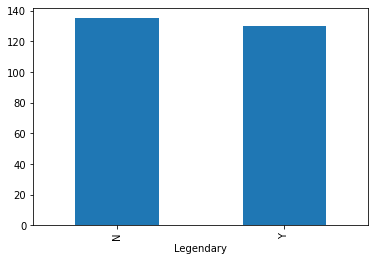

In [79]:
poke_1['Defense'].plot(kind='bar')

### Visualitation 2

<AxesSubplot:ylabel='Generation'>

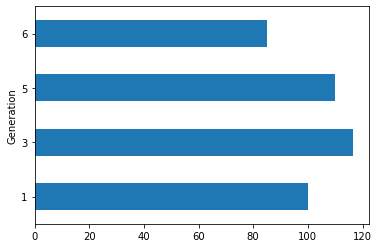

In [124]:
poke_2['Defense'].plot(kind='barh')

### Vitualitation 3

<AxesSubplot:xlabel='Type_1,Type_2'>

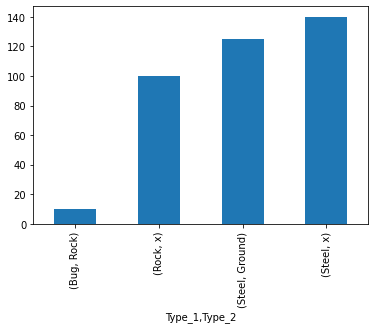

In [128]:
poke_3['Attack'].plot(kind='bar')

## vi. Kesimpulan